In [1]:
from pathlib import Path
from health_lifestyle_diabetes.infrastructure.utils.config_loader import YamlConfigLoader
from health_lifestyle_diabetes.infrastructure.utils.paths import get_repository_root
from health_lifestyle_diabetes.infrastructure.logger.config import configure_logging
from health_lifestyle_diabetes.infrastructure.logger.loguru_logger import LoguruLogger
from health_lifestyle_diabetes.infrastructure.data_sources.csv_dataset_repository import CSVDatasetRepository 

# Configure logging
configure_logging(env="dev")

# Get repository root path
root = get_repository_root()

# Load configuration
config_loader = YamlConfigLoader()
paths = config_loader.load_config(f"{root}/configs/paths.yaml")
train_paths = get_repository_root() / Path(paths["data"]["input"]["train_dataset"])

# Initialize Logger
logger = LoguruLogger()

# Load Dataset fron CSV file
csv_repo = CSVDatasetRepository(logger=logger,source_path=train_paths) 

# Lit le fichier CSV et le charge en mémoire (DataFrame Pandas).
data = csv_repo.load_dataset()

# Show the 5 first rows
display(data.head()) # Affiche les 5 premières lignes pour validation.
print(f"le dataset chargé a {data.shape[0]} lignes et {data.shape[1]} colonnes")

2025-12-26 23:24:31 | INFO     | config.py:67 | configure_logging() | Loguru configuré avec succès (mode: dev) | {'env': 'dev'}
2025-12-26 23:24:31 | INFO     | csv_dataset_repository.py:56 | load_dataset() | Chargement du dataset depuis : /Users/surelmanda/Downloads/ml-projects/Clean-Architecture-MLops/health_lifestyle_diabetes/data/input/train.csv | {}
2025-12-26 23:24:32 | INFO     | csv_dataset_repository.py:63 | load_dataset() | Dataset chargé avec succès (77837 lignes, 31 colonnes). | {}


,Age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,40,Female,White,Graduate,Upper-Middle,Employed,Current,4,83,6.7,...,48,92,131,85,104,7.59,5.21,24.6,Type 2,1
1,49,Male,Asian,Postgraduate,Lower-Middle,Employed,Former,2,345,6.4,...,41,127,186,109,187,12.01,6.75,25.0,Type 2,1
2,22,Other,Other,Postgraduate,Middle,Retired,Never,3,206,5.6,...,41,95,124,112,151,9.69,6.36,16.8,Pre-Diabetes,0
3,90,Female,Asian,Highschool,Middle,Employed,Never,2,73,9.4,...,41,204,79,113,129,18.75,5.75,40.9,Pre-Diabetes,0
4,58,Female,White,Highschool,Lower-Middle,Unemployed,Never,3,152,4.2,...,46,61,92,101,162,9.11,6.52,28.8,Type 2,1


le dataset chargé a 77837 lignes et 31 colonnes


In [2]:
from health_lifestyle_diabetes.infrastructure.feature_engineering.pipeline_feature_engineering import FeatureEngineeringPipeline

pipeline = FeatureEngineeringPipeline(logger=LoguruLogger())
df_enriched = pipeline.transform(data)

# Affiche les 5 premières lignes du dataset enrichi pour validation.
display(df_enriched.head())
print(f"Le dataset d'entrainement initial avait {data.shape[1]} colonnes")
print(f"Le dataset d'entrainement fianla apres FE a desormais {df_enriched.shape[1]} colonnes")

2025-12-26 23:24:32 | INFO     | pipeline_feature_engineering.py:82 | transform() | Démarrage du pipeline complet de Feature Engineering... | {}


2025-12-26 23:24:32 | INFO     | exclusion.py:36 | drop_leakage_columns() | Vérification des colonnes à risque de data leakage... | {}
2025-12-26 23:24:32 | INFO     | exclusion.py:40 | drop_leakage_columns() | Suppression des colonnes à risque de leakage : ['diabetes_stage', 'diabetes_risk_score'] | {}
2025-12-26 23:24:32 | INFO     | base_preprocessing.py:25 | clean_categorical_variables() | Nettoyage des variables catégorielles... | {}
2025-12-26 23:24:32 | INFO     | base_preprocessing.py:32 | clean_categorical_variables() | Libellés uniformisés avec succès. | {}
2025-12-26 23:24:32 | INFO     | demographics_features.py:82 | transform() | Création des variables démographiques... | {}
2025-12-26 23:24:32 | INFO     | demographics_features.py:68 | _create_age_group() | Utilisation du découpage d'âge en 3 catégories. | {}
2025-12-26 23:24:32 | INFO     | demographics_features.py:111 | transform() | Variables démographiques complétées. | {}
2025-12-26 23:24:32 | INFO     | medical_feat

,Age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,glucose_diff,glycemic_load,dyslipidemia_flag,cardiometabolic_burden_score,bp_ratio,activity_adequacy_ratio,screen_sleep_ratio,sedentary_risk_flag,lifestyle_score,sleep_efficiency
0,40,Female,White,Graduate,Upper-Middle,Employed,Current,4,83,6.7,...,19,1878.5,0,0,1.411765,0.553333,1.136986,1,4,0.784946
1,49,Male,Asian,Postgraduate,Lower-Middle,Employed,Ex-Smoker,2,345,6.4,...,78,4011.2,1,2,1.859375,2.300000,0.369565,0,6,1.703704
2,22,Unknown,Other,Postgraduate,Middle,Inactive,Never,3,206,5.6,...,39,2844.8,0,1,1.384615,1.373333,0.714286,0,6,1.184615
3,90,Female,Asian,Highschool,Middle,Employed,Never,2,73,9.4,...,16,3412.6,0,3,2.157143,0.486667,0.913043,1,6,0.945205
4,58,Female,White,Highschool,Lower-Middle,Inactive,Never,3,152,4.2,...,61,2373.5,0,0,1.265957,1.013333,1.291667,0,6,0.699029


Le dataset d'entrainement initial avait 31 colonnes
Le dataset d'entrainement fianla apres FE a desormais 52 colonnes


In [3]:
from health_lifestyle_diabetes.infrastructure.utils.config_loader import YamlConfigLoader
from health_lifestyle_diabetes.infrastructure.utils.paths import get_repository_root
from health_lifestyle_diabetes.infrastructure.logger.loguru_logger import LoguruLogger
from health_lifestyle_diabetes.infrastructure.splitters.sklearn_splitter import SklearnDatasetSplitter

# Load configuration
config_loader = YamlConfigLoader()
cfg = config_loader.load_config(f"{get_repository_root()}/configs/splitter.yaml")
print(f"Splitter configuration: {cfg['splitter']}")

logger = LoguruLogger()

splitter = SklearnDatasetSplitter(
    train_size=cfg["splitter"]["train_size"],
    target_column=cfg["splitter"]["target_column"],
    random_state=cfg["splitter"]["random_state"],
    logger=logger,
)
train_df_enriched, valid_df_enriched = splitter.split(df_enriched)
print("Dataset successfully split into training and validation sets.\n")
print(f"Train set shape: {train_df_enriched.shape}")
print(f"Validation set shape: {valid_df_enriched.shape}")

Splitter configuration: {'train_size': 0.8, 'target_column': 'diagnosed_diabetes', 'random_state': 42}
2025-12-26 23:24:34 | DEBUG    | sklearn_splitter.py:37 | __init__() | SklearnDatasetSplitter initialized | {}
2025-12-26 23:24:34 | INFO     | sklearn_splitter.py:42 | split() | Starting dataset split | {}
Dataset successfully split into training and validation sets.
2025-12-26 23:24:34 | INFO     | sklearn_splitter.py:57 | split() | Split done | train=(62269, 52) | test=(15568, 52) | {}

Train set shape: (62269, 52)
Validation set shape: (15568, 52)


In [4]:
# Étape 4.1 : Répartition finale des datasets
print("Étape 4.1 : Répartition finale des lignes du dataset :")
print(f"- Entraînement final (train_df_enriched) : {train_df_enriched.shape[0]} lignes")
print(f"- Validation (valid_df_enriched) : {valid_df_enriched.shape[0]} lignes")


print("*" * 100)

# Étape 5.1 : Définition de la variable cible
TARGET = cfg["splitter"]["target_column"]

# Étape 5.2 : Création des matrices X (features) et des vecteurs y (target) pour chaque set
# Pour l'entraînement final
X_train = train_df_enriched.drop(columns=[TARGET])
y_train = train_df_enriched[TARGET]

# Pour la validation
X_valid = valid_df_enriched.drop(columns=[TARGET])
y_valid = valid_df_enriched[TARGET]

# Affichage des dimensions des matrices et vecteurs
print("Étape 5.3 : Dimensions finales des matrices de caractéristiques (X) :")
print(f"- X_train (Features d'entraînement) : {X_train.shape[0]} lignes, {X_train.shape[1]} colonnes")
print(f"- X_valid (Features de validation)  : {X_valid.shape[0]} lignes, {X_valid.shape[1]} colonnes")

print("\nÉtape 5.4 : Vérification des vecteurs cibles (y) :")
print(f"- y_train : {y_train.shape[0]} lignes")
print(f"- y_valid : {y_valid.shape[0]} lignes")

Étape 4.1 : Répartition finale des lignes du dataset :
- Entraînement final (train_df_enriched) : 62269 lignes
- Validation (valid_df_enriched) : 15568 lignes
****************************************************************************************************
Étape 5.3 : Dimensions finales des matrices de caractéristiques (X) :
- X_train (Features d'entraînement) : 62269 lignes, 51 colonnes
- X_valid (Features de validation)  : 15568 lignes, 51 colonnes

Étape 5.4 : Vérification des vecteurs cibles (y) :
- y_train : 62269 lignes
- y_valid : 15568 lignes


In [5]:
import matplotlib.pyplot as plt

def plot_metrics_bar(metrics: dict, title: str = "Model Evaluation Metrics"):
    """
    Plot simple en barres des métriques avec valeur annotée.
    """
    keys = list(metrics.keys())
    values = list(metrics.values())

    plt.figure(figsize=(18, 6))
    bars = plt.bar(keys, values, color="#007bff", alpha=0.85)

    # Rotation des labels pour lisibilité
    plt.xticks(rotation=0)

    # Affichage des valeurs au-dessus des barres
    for bar, value in zip(bars, values):
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{value:.3f}",
            ha="center",
            va="bottom",
            fontsize=10,
            fontweight="bold"
        )

    plt.title(title)
    plt.ylabel("Score")
    plt.ylim(0, max(values) + 0.05)
    plt.grid(axis="y", linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()

2025-12-26 23:24:35 | INFO     | config.py:67 | configure_logging() | Loguru configuré avec succès (mode: dev) | {'env': 'dev'}
2025-12-26 23:24:35 | DEBUG    | mlflow_setup.py:36 | __init__() | Tracking URI : sqlite://///Users/surelmanda/Downloads/ml-projects/mlflow_central/db/mlruns.db | {}
2025-12-26 23:24:35 | DEBUG    | mlflow_setup.py:37 | __init__() | Artifact URI : /Users/surelmanda/Downloads/ml-projects/mlflow_central/mlflow_artifacts | {}


2025/12/26 23:24:36 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/12/26 23:24:36 INFO mlflow.store.db.utils: Updating database tables
2025/12/26 23:24:36 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2025/12/26 23:24:36 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2025/12/26 23:24:36 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2025/12/26 23:24:36 INFO alembic.runtime.migration: Will assume non-transactional DDL.


Starting experiment 'health_lifestyle_diabetes' with run name 'CatBoost'2025-12-26 23:24:36 | INFO     | mlflow_setup.py:53 | configure() | MLflow configuré avec succès. | {}

2025-12-26 23:24:36 | INFO     | mlflow_tracker.py:25 | __init__() | MLflowExperimentTracker prêt. | {}
2025-12-26 23:24:36 | INFO     | experiment_tracking_service.py:23 | __init__() | ExperimentTrackingService initialisé. | {}
2025-12-26 23:24:36 | INFO     | experiment_tracking_service.py:30 | start_experiment() | Initialisation de l'expérience 'health_lifestyle_diabetes' (run='CATB_2025-12-26_23h24m36s') | {}
2025-12-26 23:24:36 | INFO     | mlflow_tracker.py:56 | setup_experiment() | Expérience active : health_lifestyle_diabetes | {}
2025-12-26 23:24:36 | INFO     | mlflow_tracker.py:70 | start_run() | Run démarrée : CATB_2025-12-26_23h24m36s | {}
2025-12-26 23:24:36 | DEBUG    | experiment_tracking_service.py:43 | log_training_context() | Enregistrement du contexte d'entraînement pour CatBoost | {}
2025-12-

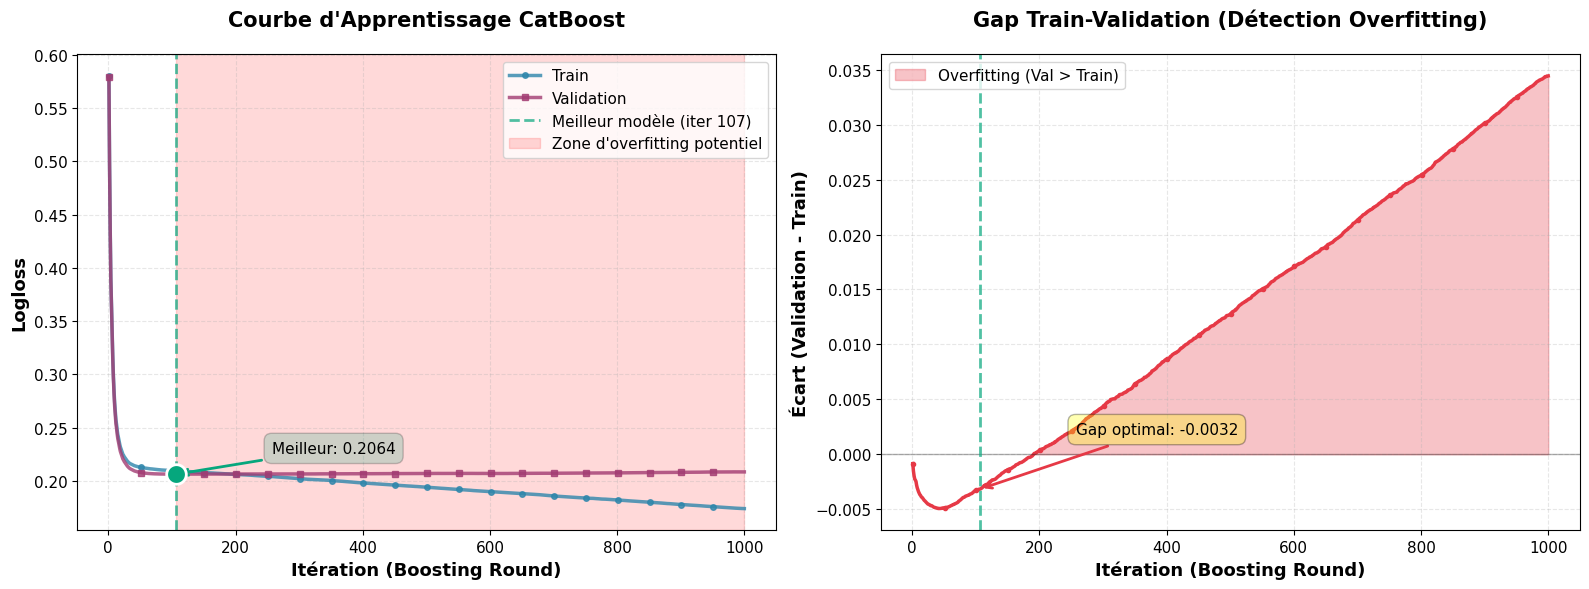

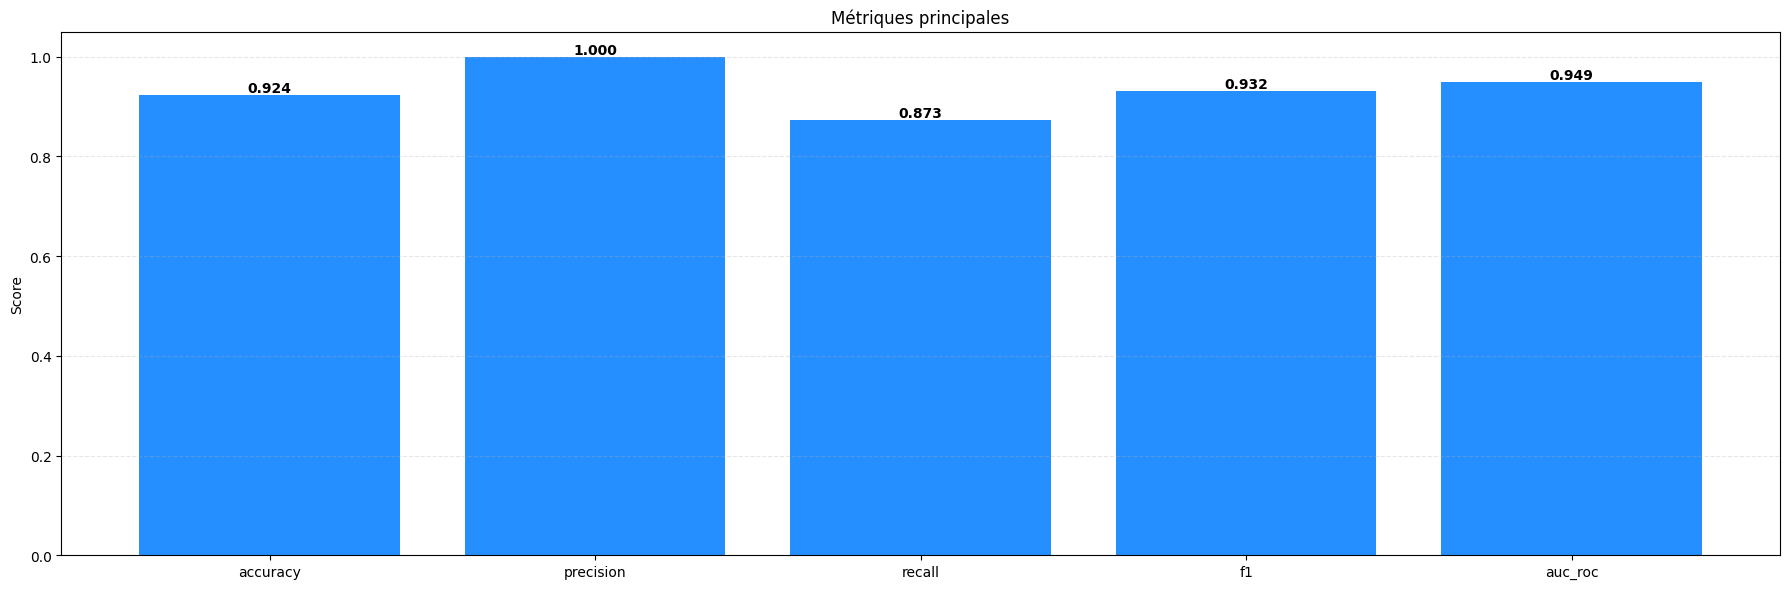

2025-12-26 23:25:20 | INFO     | experiment_tracking_service.py:48 | log_evaluation() | Métriques d'évaluation : {'accuracy': 0.9238, 'precision': 1.0, 'recall': 0.8729, 'f1': 0.9322, 'auc_roc': 0.9489} | {}
2025-12-26 23:25:20 | DEBUG    | mlflow_tracker.py:87 | log_metrics() | Métriques enregistrées : {'accuracy': 0.9238, 'precision': 1.0, 'recall': 0.8729, 'f1': 0.9322, 'auc_roc': 0.9489} | {}
2025-12-26 23:25:20 | INFO     | experiment_tracking_service.py:61 | close() | Fermeture de l'expérience. | {}
2025-12-26 23:25:20 | INFO     | mlflow_tracker.py:76 | end_run() | Fermeture de la run : c015c00699f64c65ba9c854cd0ad9033 | {}

Exécution terminée. Vérifier MLflow UI.


In [6]:
# ============================================================
# 0) Imports - Dépendances Clean Architecture
# ============================================================
from fastapi import params
from health_lifestyle_diabetes.infrastructure.logger.config import configure_logging
from health_lifestyle_diabetes.infrastructure.logger.loguru_logger import LoguruLogger
from health_lifestyle_diabetes.infrastructure.tracking.mlflow_tracker import MLflowExperimentTracker
from health_lifestyle_diabetes.application.services.experiment_tracking_service import ExperimentTrackingService
from health_lifestyle_diabetes.infrastructure.tracking.run_name_generator import generate_run_name
from health_lifestyle_diabetes.infrastructure.model_trainers.catboost_trainer import (
    CatBoostTrainer,
)
from health_lifestyle_diabetes.infrastructure.training_diagnostics.diagnostics import (
    BoostingTrainingDiagnostics,
)

# ============================================================
# 1.) Config log + injection dépendances
# ============================================================
configure_logging(env="dev")

logger = LoguruLogger()
tracker = MLflowExperimentTracker(logger=logger)
tracking_service = ExperimentTrackingService(tracker=tracker, logger=logger)

# ============================================================
# 2.) Démarrer une expérience CatBoost dans MLflow
# ============================================================
EXPERIMENT_NAME = "health_lifestyle_diabetes"
RUN_NAME = generate_run_name(prefix="CATB")
MODEL_NAME = "CatBoost"
print(f"Starting experiment '{EXPERIMENT_NAME}' with run name '{MODEL_NAME}'")


tracking_service.start_experiment(
    experiment_name=EXPERIMENT_NAME,
    run_name=RUN_NAME
)

# ============================================================
# 4) Définition du modèle + log des paramètres
# ============================================================
# =========================
# Paramètres CatBoost
# =========================
catboost_params = {
    "iterations": 1000,
    "learning_rate": 0.05,
    "depth": 6,
    "loss_function": "Logloss",
    "eval_metric": "Logloss",  #"AUC"
    "verbose": 100,   # ← test du verbose
}
# Tracking des paramètres sur l'expérience mlflow
tracking_service.log_training_context(model_name=MODEL_NAME, params=catboost_params)
# =========================
# Entraînement
# =========================
trainer = CatBoostTrainer(params=catboost_params,logger=logger)
model = trainer.train(
    X_train=X_train,
    y_train=y_train,
    X_valid=X_valid,
    y_valid=y_valid,
)

print("Modèle entraîné :", model)


# ============================================================
# 5.) Plot des diagnostics d'entraînement
# ============================================================
diagnostics = BoostingTrainingDiagnostics(
    model=model,
    model_name=MODEL_NAME,
    run_name=RUN_NAME,
)

diagnostics.run(
    backend="matplotlib",  # "matplotlib" ou "plotly"
    save_figure=True,
)

# ============================================================
# 6.) Évaluation du modèle sur le jeu de validation
# ============================================================
from health_lifestyle_diabetes.infrastructure.metrics.sklearn_metrics_adapter import SklearnMetricsAdapter
from health_lifestyle_diabetes.application.services.evaluation_service import EvaluationService

# Probabilités prédites par ton modèle
y_proba = model.predict_proba(X_valid)[:, 1]
y_true = y_valid

# Injection de dépendances
metrics_adapter = SklearnMetricsAdapter()
evaluator = EvaluationService(metrics_adapter)

# Évaluation
results = evaluator.evaluate(y_true, y_proba, threshold=0.5)
extra = results.extra_metrics or {}
main = {k: extra[k] for k in ["accuracy", "precision", "recall", "f1", "auc_roc"] if k in extra}
plot_metrics_bar(main, "Métriques principales")

# Log evaluation metrics
tracking_service.log_evaluation(main)

# ============================================================
# 7.) Fin de l'expérience
# ============================================================
tracking_service.close()

print("\nExécution terminée. Vérifier MLflow UI.")

In [ ]:
from health_lifestyle_diabetes.infrastructure.calibration.sklearn_calibrator import (
    SklearnCalibrationAdapter,
)
from health_lifestyle_diabetes.application.services.calibration_service import CalibrationService
from health_lifestyle_diabetes.infrastructure.logger.loguru_logger import LoguruLogger

logger = LoguruLogger()

# 1) INJECTION
calibration_adapter = SklearnCalibrationAdapter(logger=logger)
calibration_service = CalibrationService(calibrator=calibration_adapter, logger=logger)

# 2) CALIBRAGE
calibrated_model = calibration_service.calibrate_model(
    model=model,       # ton modèle déjà entraîné !
    X_calib=X_valid.reset_index(drop=True),
    y_calib=y_valid.reset_index(drop=True),
    method="temperature",
    cv=5,
    ensemble="auto",
)

# 3) UTILISATION
#y_proba_calibrated = calibrated_model.predict_proba(X_test)[:, 1]

In [7]:
"""
===========================================================
CATBOOST - VERSION "CALIBRÉE EN INTERNE"
Optimisation des paramètres pour une sortie probabiliste fiable
===========================================================
"""

import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, brier_score_loss, log_loss


# =========================================================
# CONFIGURATION DES DONNÉES
# =========================================================
TARGET = cfg["splitter"]["target_column"]

X_train = train_df_enriched.drop(columns=[TARGET])
y_train = train_df_enriched[TARGET]

X_valid = valid_df_enriched.drop(columns=[TARGET])
y_valid = valid_df_enriched[TARGET]

cat_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print("📌 Target :", TARGET)
print("🧩 Cat features :", cat_features)


# =========================================================
# CATBOOST - VERSION "CALIBRÉE INTERNE"
# =========================================================
model = CatBoostClassifier(
    # Calibration naturelle via optimisation logloss
    loss_function="Logloss",
    eval_metric="Logloss",
    
    # Paramétrage pour probas stables
    learning_rate=0.03,
    depth=6,
    l2_leaf_reg=5,         
    border_count=128,       # Finesse des seuils -> proba moins extrêmes
    random_seed=42,

    # Anti-surapprentissage -> proba + fiables
    bootstrap_type="Bayesian",
    bagging_temperature=0.5,
    rsm=0.8,

    # Données déséquilibrées ? -> meilleure calibration native
    auto_class_weights="Balanced",   # <--- très important

    # Optimisation
    iterations=800,
    early_stopping_rounds=50,
    verbose=100
)

print("\n🚀 Entraînement du modèle calibré (interne)...\n")
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_valid, y_valid)
)
print("\n✔️ Modèle entraîné.")


# =========================================================
# ÉVALUATION
# =========================================================
proba = model.predict_proba(X_valid)[:, 1]

auc = roc_auc_score(y_valid, proba)
brier = brier_score_loss(y_valid, proba)
ll = log_loss(y_valid, proba)

print("\n📊 Résultats (CALIBRATION INTERNE)")
print("----------------------------------")
print(f"🎯 AUC        : {auc:.4f}")
print(f"🔧 BrierScore : {brier:.4f}  (↓ mieux)")
print(f"📉 LogLoss    : {ll:.4f}     (↓ mieux)")


# =========================================================
# SAUVEGARDE DU MODÈLE
# =========================================================
model.save_model("catboost_calibrated_internal.cbm")
print("\n💾 Modèle sauvegardé : catboost_calibrated_internal.cbm")


# =========================================================
# RECHARGEMENT (exemple)
# =========================================================
"""
from catboost import CatBoostClassifier

loaded = CatBoostClassifier()
loaded.load_model("catboost_calibrated_internal.cbm")

# PREDICTION
p = loaded.predict_proba(X_valid)[:, 1]
print("Proba prédite :", p[:10])
"""

📌 Target : diagnosed_diabetes
🧩 Cat features : ['gender', 'ethnicity', 'education_level', 'income_level', 'employment_status', 'smoking_status', 'age_group', 'glucose_status', 'hba1c_category', 'bmi_category', 'bp_category']

🚀 Entraînement du modèle calibré (interne)...

0:	learn: 0.6315429	test: 0.6311080	best: 0.6311080 (0)	total: 63.8ms	remaining: 51s
100:	learn: 0.2059581	test: 0.2012855	best: 0.2012855 (100)	total: 4.72s	remaining: 32.7s
200:	learn: 0.2031971	test: 0.2002697	best: 0.2002697 (200)	total: 9.04s	remaining: 27s
300:	learn: 0.2014042	test: 0.2001391	best: 0.2001357 (276)	total: 13s	remaining: 21.6s
400:	learn: 0.1996155	test: 0.2000507	best: 0.2000299 (352)	total: 18.1s	remaining: 18s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.2000298866
bestIteration = 352

Shrink model to first 353 iterations.

✔️ Modèle entraîné.

📊 Résultats (CALIBRATION INTERNE)
----------------------------------
🎯 AUC        : 0.9492
🔧 BrierScore : 0.0656  (↓ mieux)
📉 Lo

'\nfrom catboost import CatBoostClassifier\n\nloaded = CatBoostClassifier()\nloaded.load_model("catboost_calibrated_internal.cbm")\n\n# PREDICTION\np = loaded.predict_proba(X_valid)[:, 1]\nprint("Proba prédite :", p[:10])\n'

In [10]:
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score, brier_score_loss, log_loss


# On convertit les colonnes object en category
for col in X_train.select_dtypes(exclude="number").columns:
    X_train[col] = X_train[col].astype("category")
    X_valid[col] = X_valid[col].astype("category")

# 🔹 Modèle brut
xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    enable_categorical=True,  # 💥 Important
    random_state=42
)

print("\n🚀 Entraînement XGBoost...")
xgb.fit(X_train, y_train)

# 🔹 Calibration
print("🎛️ Calibration XGBoost (Isotonic)...")
xgb_calibrated = CalibratedClassifierCV(
    xgb,
    method="isotonic",
    cv=5
)
xgb_calibrated.fit(X_valid, y_valid)

# 🔹 Évaluation
proba_xgb_before = xgb.predict_proba(X_valid)[:,1]
proba_xgb_after  = xgb_calibrated.predict_proba(X_valid)[:,1]

print("\n📊 XGBoost — AVANT / APRÈS")
print("AUC       :", roc_auc_score(y_valid, proba_xgb_before), "→", roc_auc_score(y_valid, proba_xgb_after))
print("Brier     :", brier_score_loss(y_valid, proba_xgb_before), "→", brier_score_loss(y_valid, proba_xgb_after))
print("LogLoss   :", log_loss(y_valid, proba_xgb_before), "→", log_loss(y_valid, proba_xgb_after))


🚀 Entraînement XGBoost...
🎛️ Calibration XGBoost (Isotonic)...

📊 XGBoost — AVANT / APRÈS
AUC       : 0.9455794905812216 → 0.9999893581186818
Brier     : 0.06421229988336563 → 0.038636418700762586
LogLoss   : 0.21002356039591372 → 0.1388345650061857


In [11]:
from lightgbm import LGBMClassifier

# On convertit les colonnes object en category
for col in X_train.select_dtypes(exclude="number").columns:
    X_train[col] = X_train[col].astype("category")
    X_valid[col] = X_valid[col].astype("category")

# 🔹 Modèle brut
lgb = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary",
    random_state=42
)

print("\n🚀 Entraînement LightGBM...")
lgb.fit(X_train, y_train)

# 🔹 Calibration
print("🎛️ Calibration LightGBM (Platt / sigmoid)...")
lgb_calibrated = CalibratedClassifierCV(
    lgb,
    method="sigmoid",
    cv=5
)
lgb_calibrated.fit(X_valid, y_valid)

# 🔹 Évaluation
proba_lgb_before = lgb.predict_proba(X_valid)[:,1]
proba_lgb_after  = lgb_calibrated.predict_proba(X_valid)[:,1]

print("\n📊 LightGBM — AVANT / APRÈS")
print("AUC       :", roc_auc_score(y_valid, proba_lgb_before), "→", roc_auc_score(y_valid, proba_lgb_after))
print("Brier     :", brier_score_loss(y_valid, proba_lgb_before), "→", brier_score_loss(y_valid, proba_lgb_after))
print("LogLoss   :", log_loss(y_valid, proba_lgb_before), "→", log_loss(y_valid, proba_lgb_after))


🚀 Entraînement LightGBM...
[LightGBM] [Info] Number of positive: 37364, number of negative: 24905
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5239
[LightGBM] [Info] Number of data points in the train set: 62269, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.600042 -> initscore=0.405639
[LightGBM] [Info] Start training from score 0.405639
🎛️ Calibration LightGBM (Platt / sigmoid)...
[LightGBM] [Info] Number of positive: 7473, number of negative: 4981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5066
[LightGBM] [Info] Number of data points in

/Users/surelmanda/Downloads/ml-projects/Clean-Architecture-MLops/health_lifestyle_diabetes/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


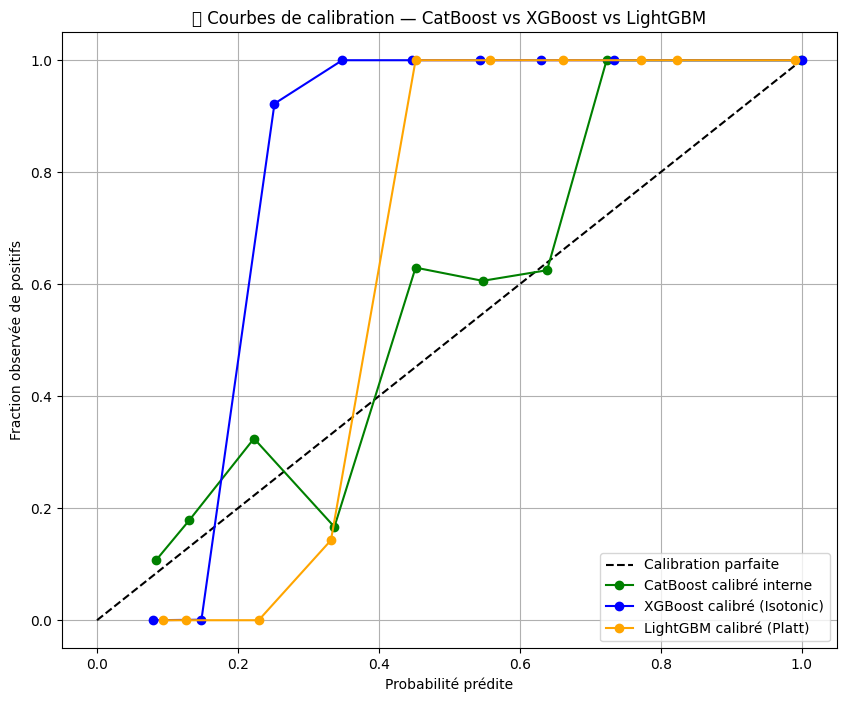

In [ ]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve


# Proba calibrées
proba_cat = model.predict_proba(X_valid)[:,1]  # ton modèle calibré interne
proba_xgb = xgb_calibrated.predict_proba(X_valid)[:,1]
proba_lgb = lgb_calibrated.predict_proba(X_valid)[:,1]

# Courbes
fop_cat, mpv_cat = calibration_curve(y_valid, proba_cat, n_bins=10)
fop_xgb, mpv_xgb = calibration_curve(y_valid, proba_xgb, n_bins=10)
fop_lgb, mpv_lgb = calibration_curve(y_valid, proba_lgb, n_bins=10)

plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],'k--',label="Calibration parfaite")

plt.plot(mpv_cat, fop_cat,'o-',label="CatBoost calibré interne",color="green")
plt.plot(mpv_xgb, fop_xgb,'o-',label="XGBoost calibré (Isotonic)",color="blue")
plt.plot(mpv_lgb, fop_lgb,'o-',label="LightGBM calibré (Platt)",color="orange")

plt.xlabel("Probabilité prédite")
plt.ylabel("Fraction observée de positifs")
plt.title("📌 Courbes de calibration — CatBoost vs XGBoost vs LightGBM")
plt.legend()
plt.grid()
plt.show()

In [13]:
from health_lifestyle_diabetes.infrastructure.calibration.sklearn_calibrator import (
    SklearnCalibrationAdapter,
)
from health_lifestyle_diabetes.application.services.calibration_service import CalibrationService
from health_lifestyle_diabetes.infrastructure.logger.loguru_logger import LoguruLogger

logger = LoguruLogger()

# 1) INJECTION
calibration_adapter = SklearnCalibrationAdapter(logger=logger)
calibration_service = CalibrationService(calibrator=calibration_adapter, logger=logger)

# 2) CALIBRAGE
calibrated_model = calibration_service.calibrate_model(
    model=xgb,       # ton modèle déjà entraîné !
    X_calib=X_valid.reset_index(drop=True),
    y_calib=y_valid.reset_index(drop=True),
    method="temperature",
    cv=5,
    ensemble="auto",
)


2025-12-26 19:08:46 | INFO     | calibration_service.py:21 | calibrate_model() | Début du calibrage modèle... | {}
2025-12-26 19:08:46 | INFO     | sklearn_calibrator.py:35 | calibrate() | Calibration du modèle avec method='temperature', cv=5, ensemble=auto | {}
2025-12-26 19:08:51 | INFO     | sklearn_calibrator.py:48 | calibrate() | Calibration terminée avec succès. | {}
2025-12-26 19:08:51 | INFO     | calibration_service.py:23 | calibrate_model() | Modèle calibré prêt à l'utilisation. | {}


In [17]:
from health_lifestyle_diabetes.infrastructure.calibration.sklearn_calibrator import (
    SklearnCalibrationAdapter,
)
from health_lifestyle_diabetes.application.services.calibration_service import CalibrationService
from health_lifestyle_diabetes.infrastructure.logger.loguru_logger import LoguruLogger

logger = LoguruLogger()

# 1) INJECTION
calibration_adapter = SklearnCalibrationAdapter(logger=logger)
calibration_service = CalibrationService(calibrator=calibration_adapter, logger=logger)

# 2) CALIBRAGE
calibrated_model = calibration_service.calibrate_model(
    model=lgb,       # ton modèle déjà entraîné !
    X_calib=X_valid.reset_index(drop=True),
    y_calib=y_valid.reset_index(drop=True),
    method="sigmoid",
    cv=5,
    ensemble="auto",
)


2025-12-26 19:15:37 | INFO     | calibration_service.py:21 | calibrate_model() | Début du calibrage modèle... | {}


2025-12-26 19:15:37 | INFO     | sklearn_calibrator.py:35 | calibrate() | Calibration du modèle avec method='sigmoid', cv=5, ensemble=auto | {}
[LightGBM] [Info] Number of positive: 7473, number of negative: 4981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5066
[LightGBM] [Info] Number of data points in the train set: 12454, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.600048 -> initscore=0.405666
[LightGBM] [Info] Start training from score 0.405666
[LightGBM] [Info] Number of positive: 7473, number of negative: 4981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightG

In [18]:
from lightgbm import LGBMClassifier

# On convertit les colonnes object en category
for col in X_train.select_dtypes(exclude="number").columns:
    X_train[col] = X_train[col].astype("category")
    X_valid[col] = X_valid[col].astype("category")

# 🔹 Modèle brut
lgb = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary",
    random_state=42
)

print("\n🚀 Entraînement LightGBM...")
model_before = lgb.fit(X_train, y_train)



🚀 Entraînement LightGBM...
[LightGBM] [Info] Number of positive: 37364, number of negative: 24905
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5239
[LightGBM] [Info] Number of data points in the train set: 62269, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.600042 -> initscore=0.405639
[LightGBM] [Info] Start training from score 0.405639


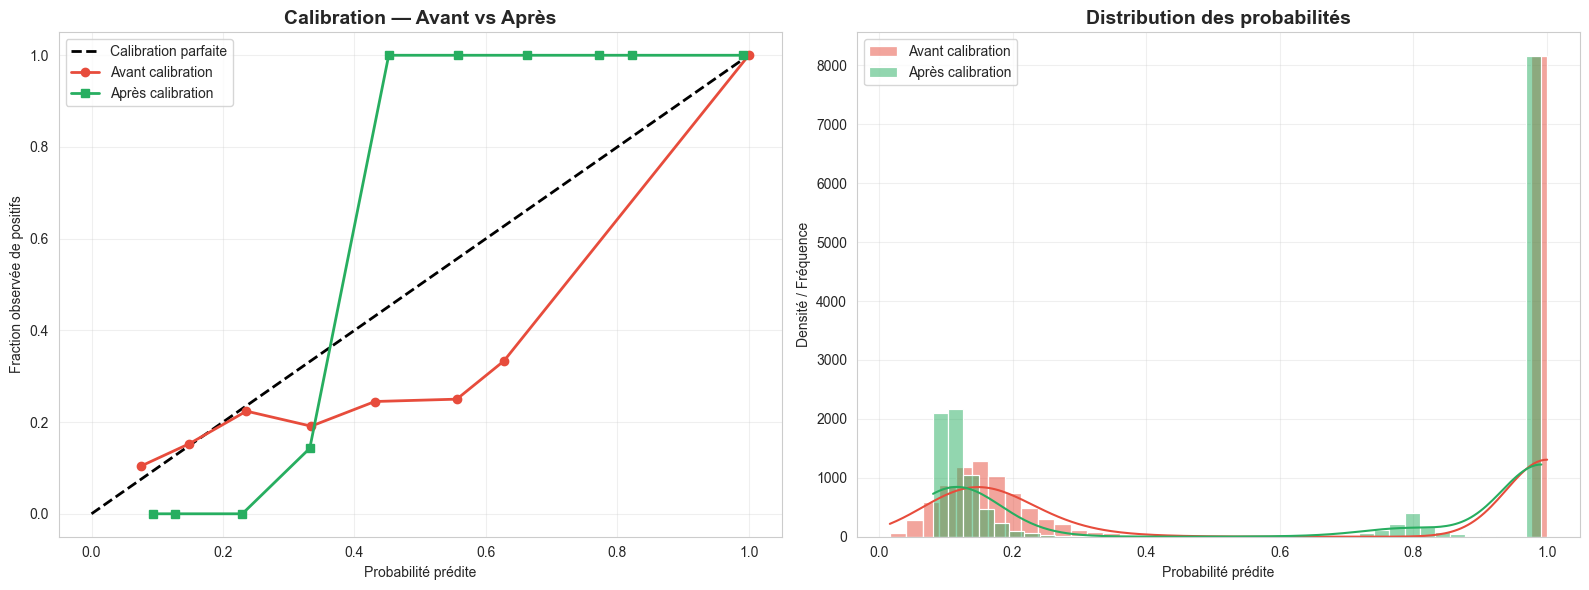

In [20]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# Probabilités prédites
# =========================
proba_before = model_before.predict_proba(X_valid)[:,1]
proba_after  = calibrated_model.predict_proba(X_valid)[:,1]

# Courbes de calibration
fop_b, mpv_b = calibration_curve(y_valid, proba_before, n_bins=10)
fop_a, mpv_a = calibration_curve(y_valid, proba_after,  n_bins=10)

# =========================
# 🎨 PLOTS
# =========================
sns.set_style("whitegrid")
plt.figure(figsize=(16,6))

# ------- Plot 1 : Calibration -------
plt.subplot(1, 2, 1)
plt.plot([0,1], [0,1], "k--", linewidth=2, label="Calibration parfaite")
plt.plot(mpv_b, fop_b, "o-", color="#e74c3c", label="Avant calibration", linewidth=2)
plt.plot(mpv_a, fop_a, "s-", color="#27ae60", label="Après calibration", linewidth=2)
plt.title("Calibration — Avant vs Après", fontsize=14, fontweight="bold")
plt.xlabel("Probabilité prédite")
plt.ylabel("Fraction observée de positifs")
plt.legend()
plt.grid(alpha=0.3)

# ------- Plot 2 : Distribution Probas -------
plt.subplot(1, 2, 2)
sns.histplot(proba_before, bins=40, kde=True, color="#e74c3c", alpha=0.5, label="Avant calibration")
sns.histplot(proba_after,  bins=40, kde=True, color="#27ae60", alpha=0.5, label="Après calibration")
plt.title("Distribution des probabilités", fontsize=14, fontweight="bold")
plt.xlabel("Probabilité prédite")
plt.ylabel("Densité / Fréquence")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [7]:
from xgboost import XGBClassifier

# On convertit les colonnes object en category
for col in X_train.select_dtypes(exclude="number").columns:
    X_train[col] = X_train[col].astype("category")
    X_valid[col] = X_valid[col].astype("category")

# Modèle brut
xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    enable_categorical=True,  # 💥 Important
    random_state=42
)

print("\n🚀 Entraînement XGBoost...")
xgb_model_before = xgb.fit(X_train, y_train)
print("\n✔️ Modèle entraîné.")



🚀 Entraînement XGBoost...

✔️ Modèle entraîné.


In [8]:
from health_lifestyle_diabetes.infrastructure.calibration.sklearn_calibrator import (
    SklearnCalibrationAdapter,
)
from health_lifestyle_diabetes.application.services.calibration_service import CalibrationService
from health_lifestyle_diabetes.infrastructure.logger.loguru_logger import LoguruLogger

logger = LoguruLogger()

# 1) INJECTION
calibration_adapter = SklearnCalibrationAdapter(logger=logger)
calibration_service = CalibrationService(calibrator=calibration_adapter, logger=logger)

# 2) CALIBRAGE
calibrated_xgb_model = calibration_service.calibrate_model(
    model=xgb_model_before,       # ton modèle déjà entraîné !
    X_calib=X_valid.reset_index(drop=True),
    y_calib=y_valid.reset_index(drop=True),
    method="temperature",
    cv=5,
    ensemble="auto",
)


2025-12-26 23:25:31 | INFO     | calibration_service.py:21 | calibrate_model() | Début du calibrage modèle... | {}
2025-12-26 23:25:31 | INFO     | sklearn_calibrator.py:35 | calibrate() | Calibration du modèle avec method='temperature', cv=5, ensemble=auto | {}
2025-12-26 23:25:37 | INFO     | sklearn_calibrator.py:48 | calibrate() | Calibration terminée avec succès. | {}
2025-12-26 23:25:37 | INFO     | calibration_service.py:23 | calibrate_model() | Modèle calibré prêt à l'utilisation. | {}


# Calibration + Plot (CatBOOST)

In [ ]:
print("\n🚀 Entraînement du modèle CatBoost calibré en interne...\n")
# ============================================================
# 1.) Définition du modèle + log des paramètres
# ============================================================
# =========================
# Paramètres CatBoost
# =========================
catboost_params = {
    # Calibration naturelle via optimisation logloss
    "loss_function":"Logloss",
    "eval_metric":"Logloss",    #"AUC"

    # Paramétrage pour probas stables
    "learning_rate":0.03,
    "depth":6,
    "l2_leaf_reg":5,         
    "border_count":128,       # Finesse des seuils -> proba moins extrêmes
    "random_seed":42,

    # Anti-surapprentissage -> proba + fiables
    "bootstrap_type":"Bayesian",
    "bagging_temperature":0.5,
    "rsm":0.8,

    # Données déséquilibrées ? -> meilleure calibration native
    "auto_class_weights":"Balanced",   # <--- très important

    # Optimisation
    "iterations":800,
    "early_stopping_rounds":50,
    "verbose":100
}
# =========================
# Entraînement
# =========================
trainer = CatBoostTrainer(params=catboost_params,logger=logger)
calibrated_catboost_model = trainer.train(
    X_train=X_train,
    y_train=y_train,
    X_valid=X_valid,
    y_valid=y_valid,
)

print("Modèle entraîné :", calibrated_catboost_model)

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, brier_score_loss, log_loss


# =========================================================
# CONFIGURATION DES DONNÉES
# =========================================================
TARGET = cfg["splitter"]["target_column"]

X_train = train_df_enriched.drop(columns=[TARGET])
y_train = train_df_enriched[TARGET]

X_valid = valid_df_enriched.drop(columns=[TARGET])
y_valid = valid_df_enriched[TARGET]

cat_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print("📌 Target :", TARGET)
print("🧩 Cat features :", cat_features)


# =========================================================
# CATBOOST - VERSION "CALIBRÉE INTERNE"
# =========================================================
model = CatBoostClassifier(
    # Calibration naturelle via optimisation logloss
    loss_function="Logloss",
    eval_metric="Logloss",
    
    # Paramétrage pour probas stables
    learning_rate=0.03,
    depth=6,
    l2_leaf_reg=5,         
    border_count=128,       # Finesse des seuils -> proba moins extrêmes
    random_seed=42,

    # Anti-surapprentissage -> proba + fiables
    bootstrap_type="Bayesian",
    bagging_temperature=0.5,
    rsm=0.8,

    # Données déséquilibrées ? -> meilleure calibration native
    auto_class_weights="Balanced",   # <--- très important

    # Optimisation
    iterations=800,
    early_stopping_rounds=50,
    verbose=100
)

print("\n🚀 Entraînement du modèle calibré (interne)...\n")
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_valid, y_valid)
)
print("\n✔️ Modèle entraîné.")


# =========================================================
# ÉVALUATION
# =========================================================
proba = model.predict_proba(X_valid)[:, 1]

auc = roc_auc_score(y_valid, proba)
brier = brier_score_loss(y_valid, proba)
ll = log_loss(y_valid, proba)

print("\n📊 Résultats (CALIBRATION INTERNE)")
print("----------------------------------")
print(f"🎯 AUC        : {auc:.4f}")
print(f"🔧 BrierScore : {brier:.4f}  (↓ mieux)")
print(f"📉 LogLoss    : {ll:.4f}     (↓ mieux)")


# =========================================================
# SAUVEGARDE DU MODÈLE
# =========================================================
model.save_model("catboost_calibrated_internal.cbm")
print("\n💾 Modèle sauvegardé : catboost_calibrated_internal.cbm")


# =========================================================
# RECHARGEMENT (exemple)
# =========================================================
"""
from catboost import CatBoostClassifier

loaded = CatBoostClassifier()
loaded.load_model("catboost_calibrated_internal.cbm")

# PREDICTION
p = loaded.predict_proba(X_valid)[:, 1]
print("Proba prédite :", p[:10])
"""

# Calibration + Plot (XGBOOST)

2025-12-26 23:29:22 | INFO     | calibration_service.py:21 | calibrate_model() | Début du calibrage modèle... | {}
2025-12-26 23:29:22 | INFO     | sklearn_calibrator.py:35 | calibrate() | Calibration du modèle avec method='temperature', cv=5, ensemble=auto | {}
2025-12-26 23:29:27 | INFO     | sklearn_calibrator.py:48 | calibrate() | Calibration terminée avec succès. | {}
2025-12-26 23:29:27 | INFO     | calibration_service.py:23 | calibrate_model() | Modèle calibré prêt à l'utilisation. | {}
2025-12-26 23:29:27 | INFO     | calibration_plot_service.py:25 | generate() | Début génération plots calibration... | {}
2025-12-26 23:29:27 | INFO     | calibration_matplotlib_adapter.py:66 | plot_calibration() | Plot calibration pour le modèle 'XGBoost' | {}
2025-12-26 23:29:28 | INFO     | calibration_matplotlib_adapter.py:115 | plot_calibration() | Calibration plot sauvegardé : /Users/surelmanda/Downloads/ml-projects/Clean-Architecture-MLops/health_lifestyle_diabetes/reports/figures/XGBoost_

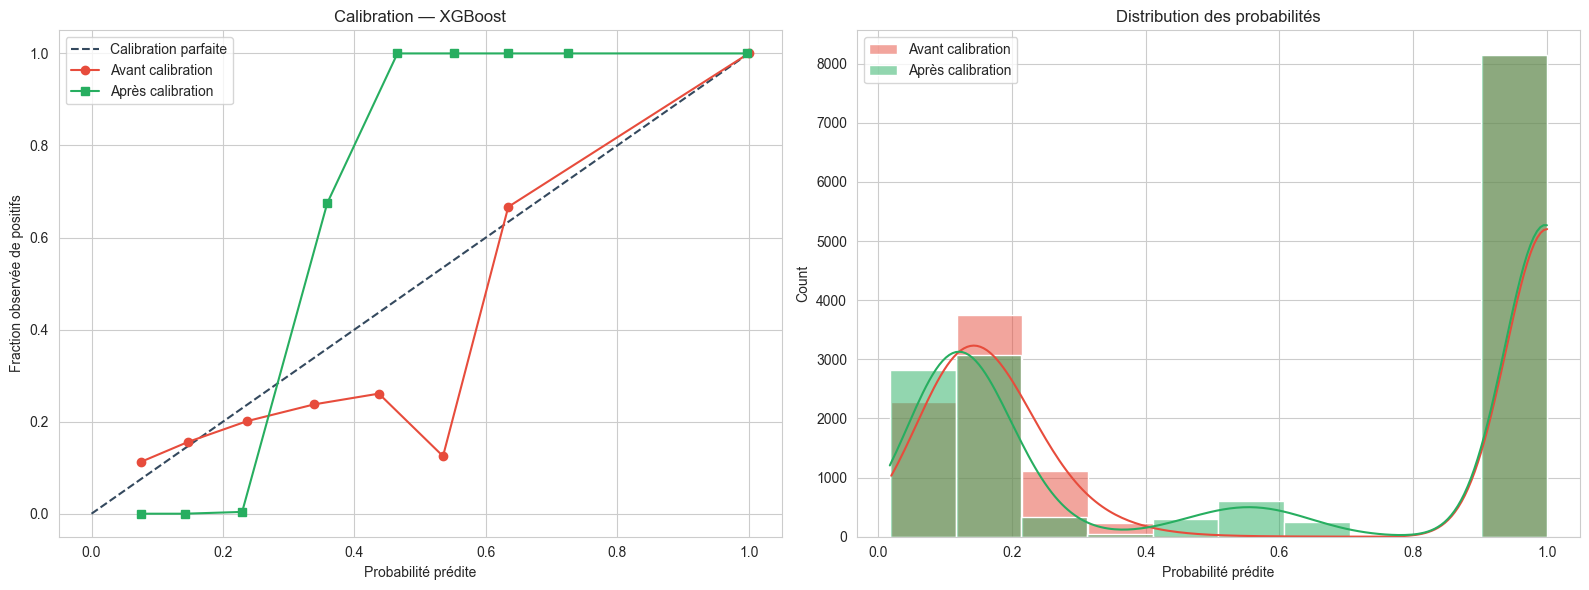

2025-12-26 23:29:28 | INFO     | calibration_matplotlib_adapter.py:118 | plot_calibration() | Plot de calibration terminé. | {}
2025-12-26 23:29:28 | INFO     | calibration_plot_service.py:34 | generate() | Plots calibration générés avec succès. | {}


In [ ]:
# ================================
#  IMPORTS
# ================================
from health_lifestyle_diabetes.infrastructure.logger.loguru_logger import LoguruLogger

# -- Calibration
from health_lifestyle_diabetes.infrastructure.calibration.sklearn_calibrator import (
    SklearnCalibrationAdapter,
)
from health_lifestyle_diabetes.application.services.calibration_service import (
    CalibrationService,
)

# -- Calibration Plot
from health_lifestyle_diabetes.infrastructure.visualization.calibration_matplotlib_adapter import (
    MatplotlibCalibrationPlotAdapter,
)
from health_lifestyle_diabetes.application.services.calibration_plot_service import (
    CalibrationPlotService,
)

from xgboost import XGBClassifier

# ================================
#  1. Modèle XGBoost avant calibration
# ================================
# On convertit les colonnes object en category
for col in X_train.select_dtypes(exclude="number").columns:
    X_train[col] = X_train[col].astype("category")
    X_valid[col] = X_valid[col].astype("category")

# Modèle brut
xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    enable_categorical=True,  
    random_state=42
)

print("\n Entraînement XGBoost...")
xgb_model_before = xgb.fit(X_train, y_train)
print("\n Modèle entraîné.")


# ================================
#  1. CALIBRATION DU MODELE
# ================================
logger = LoguruLogger()
calibration_adapter = SklearnCalibrationAdapter(logger=logger)
calibration_service = CalibrationService(calibrator=calibration_adapter, logger=logger)

calibrated_xgb_model = calibration_service.calibrate_model(
    model=xgb_model_before,                        # modèle AVANT calibration
    X_calib=X_valid.reset_index(drop=True),
    y_calib=y_valid.reset_index(drop=True),
    method="temperature",                          # "sigmoid" / "isotonic" / "temperature"
    cv=5,                                          # cross validation interne
    ensemble="auto",
)


# ================================
#  2.  PLOT AVANT vs APRES CALIBRATION
# ================================
plot_adapter = MatplotlibCalibrationPlotAdapter(logger=logger)
plot_service = CalibrationPlotService(plotter=plot_adapter, logger=logger)

# Proba AVANT / APRES calibration
proba_before = xgb_model_before.predict_proba(X_valid)[:, 1]
proba_after  = calibrated_xgb_model.predict_proba(X_valid)[:, 1]

plot_service.generate(
    y_true=y_valid,
    y_proba_before=proba_before,
    y_proba_after=proba_after,
    model_name="XGBoost",   # <-- adapte selon ton modèle
    bins=10,
    save=True
)

# Calibration + Plot (LightGBM)

In [ ]:
# ================================
#  IMPORTS
# ================================
from health_lifestyle_diabetes.infrastructure.logger.loguru_logger import LoguruLogger

# -- Calibration
from health_lifestyle_diabetes.infrastructure.calibration.sklearn_calibrator import (
    SklearnCalibrationAdapter,
)
from health_lifestyle_diabetes.application.services.calibration_service import (
    CalibrationService,
)

# -- Plot Calibration
from health_lifestyle_diabetes.infrastructure.visualization.calibration_matplotlib_adapter import (
    MatplotlibCalibrationPlotAdapter,
)
from health_lifestyle_diabetes.application.services.calibration_plot_service import (
    CalibrationPlotService,
)


# =====================================
#  1. Modèle LightGBM avant calibration
# =====================================

from lightgbm import LGBMClassifier

# On convertit les colonnes object en category
for col in X_train.select_dtypes(exclude="number").columns:
    X_train[col] = X_train[col].astype("category")
    X_valid[col] = X_valid[col].astype("category")

# Modèle brut
lgb = LGBMClassifier(
    n_estimators=800,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary",
    random_state=42
)

print("\n Entraînement LightGBM...")
lgbm_model_before = lgb.fit(X_train, y_train)
print("\n Modèle entraîné.")


# =====================================
#  2. CALIBRATION DU MODELE LightGBM
# =====================================
logger = LoguruLogger()
calibration_adapter = SklearnCalibrationAdapter(logger=logger)
calibration_service = CalibrationService(calibrator=calibration_adapter, logger=logger)

calibrated_lgbm_model = calibration_service.calibrate_model(
    model=lgbm_model_before,                # modèle LightGBM avant calibration
    X_calib=X_valid.reset_index(drop=True),
    y_calib=y_valid.reset_index(drop=True),
    method="temperature",                   # "sigmoid", "isotonic", "temperature"
    cv=5,
    ensemble="auto",
)


# =====================================
#  3. PLOT AVANT vs APRES CALIBRATION
# =====================================
plot_adapter = MatplotlibCalibrationPlotAdapter(logger=logger)
plot_service = CalibrationPlotService(plotter=plot_adapter, logger=logger)

# Probabilités AVANT / APRES calibration
proba_before = lgbm_model_before.predict_proba(X_valid)[:, 1]
proba_after  = calibrated_lgbm_model.predict_proba(X_valid)[:, 1]

plot_service.generate(
    y_true=y_valid,
    y_proba_before=proba_before,
    y_proba_after=proba_after,
    model_name="LightGBM",
    bins=10,
    save=True
)